In [2]:
# tensorflow>=2.7.*
import tensorflow as tf
print(tf.__version__)

2.8.2


Import TensorFlow and Keras:

In [3]:
import os

import numpy as np
import tensorflow as tf
from tensorflow import keras

import datetime

import math
import numpy as np
import random
import matplotlib.pyplot as plt
plt.style.use('default')

random.seed(42)
np.random.seed(42)

Import FashionMNIST dataset:

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4431872/4422102 [==============================] - 0s 0us/step


Print statistics about the dataset:

In [5]:
print("Train image shape:", train_images.shape)
print("Train labels:", train_labels)
print("Test image shape:", test_images.shape)
print("Test label shape:", test_labels.shape)

Train image shape: (60000, 28, 28)
Train labels: [9 0 0 ... 3 0 5]
Test image shape: (10000, 28, 28)
Test label shape: (10000,)


Print some sample images from the dataset just to know how they look like. Note that in contrast to the original TransferLearning-Personalization example from TensorFlow which works with a pre-trained MobileNetV2 and images with 224x224 resolution, FashionMNIST provides us 28x28 pixel images as below.

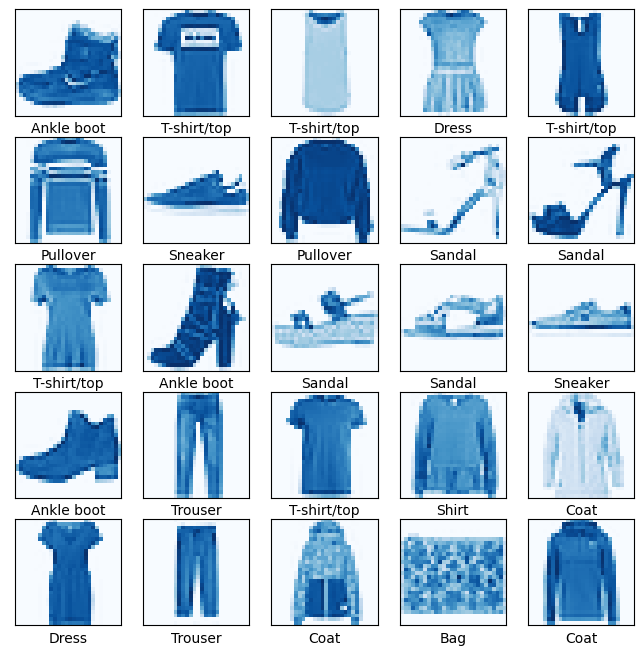

In [6]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.Blues)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Every pixel of an image represents a color intensity value between 0 and 255. We need to normalize these to have values between 0 and 1.

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Build a model. Notice that the one but the last layer is given a name "baselayer" --> This denotes where our base models ends.

In [8]:
model = keras.Sequential([
  keras.layers.Conv2D(6, (5, 5), padding='same', activation='relu',kernel_initializer='he_uniform', input_shape=(28, 28,1)),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Conv2D(32, (5, 5), kernel_initializer='he_uniform', activation='relu'),
  keras.layers.Dropout(0.1),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  # keras.layers.Dropout(0.1, name="baselayer"),
  keras.layers.Dropout(0.1),
  keras.layers.Conv2D(120, (5, 5), kernel_initializer='he_uniform', activation='relu'),
  keras.layers.Flatten(),
  keras.layers.Dense(84, activation='relu', name="baselayer"),
  keras.layers.Dense(10, activation=tf.nn.softmax)
])

Compile the model and print its summary.

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        4832      
                                                                 
 dropout (Dropout)           (None, 10, 10, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 32)          0

Train our custom model.

In [10]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, batch_size=32)

Epoch 1/10
1688/1688 [==============================] - 65s 37ms/step - loss: 0.4681 - accuracy: 0.8305 - val_loss: 0.3449 - val_accuracy: 0.8792
Epoch 2/10
1688/1688 [==============================] - 54s 32ms/step - loss: 0.3280 - accuracy: 0.8798 - val_loss: 0.3041 - val_accuracy: 0.8903
Epoch 3/10
1688/1688 [==============================] - 50s 30ms/step - loss: 0.2838 - accuracy: 0.8958 - val_loss: 0.2913 - val_accuracy: 0.8948
Epoch 4/10
1688/1688 [==============================] - 48s 28ms/step - loss: 0.2565 - accuracy: 0.9052 - val_loss: 0.2774 - val_accuracy: 0.8973
Epoch 5/10
1688/1688 [==============================] - 50s 29ms/step - loss: 0.2375 - accuracy: 0.9111 - val_loss: 0.2653 - val_accuracy: 0.9018
Epoch 6/10
1688/1688 [==============================] - 45s 27ms/step - loss: 0.2190 - accuracy: 0.9189 - val_loss: 0.2513 - val_accuracy: 0.9072
Epoch 7/10
1688/1688 [==============================] - 45s 27ms/step - loss: 0.2053 - accuracy: 0.9226 - val_loss: 0.2492 -

Chop off model's head (everything that follows "baselayer") and keep the base. Print summary.

In [11]:
model2 = tf.keras.models.Model(model.input, model.get_layer('baselayer').output)
print(model2.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        4832      
                                                                 
 dropout (Dropout)           (None, 10, 10, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                         

A slightly modified example code which uses our custom made model instead of MobileNetV2.

In [12]:
IMG_SIZE = 28 #224
NUM_FEATURES = 84   #7 * 7 * 1280
NUM_CLASSES = 4

class TransferLearningModel(tf.Module):
  """TF Transfer Learning model class."""

  def __init__(self, learning_rate=0.001):
    """Initializes a transfer learning model instance.

    Args:
      learning_rate: A learning rate for the optimzer.
    """
    self.num_features = NUM_FEATURES
    self.num_classes = NUM_CLASSES

    # trainable weights and bias for softmax
    self.ws = tf.Variable(
        tf.zeros((self.num_features, self.num_classes)),
        name='ws',
        trainable=True)
    self.bs = tf.Variable(
        tf.zeros((1, self.num_classes)), name='bs', trainable=True)

    # base model
    self.base = model2
    # loss function and optimizer
    self.loss_fn = tf.keras.losses.CategoricalCrossentropy()
    self.optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  @tf.function(input_signature=[
      tf.TensorSpec([None, IMG_SIZE, IMG_SIZE, 1], tf.float32),
  ])
  def load(self, feature):
    """Generates and loads bottleneck features from the given image batch.

    Args:
      feature: A tensor of image feature batch to generate the bottleneck from.

    Returns:
      Map of the bottleneck.
    """
    # x = tf.keras.applications.mobilenet_v2.preprocess_input(tf.multiply(feature, 255))
    bottleneck = tf.reshape(self.base(feature, training=False), (-1, self.num_features))
    return {'bottleneck': bottleneck}

  @tf.function(input_signature=[
      tf.TensorSpec([None, NUM_FEATURES], tf.float32),
      tf.TensorSpec([None, NUM_CLASSES], tf.float32),
  ])
  def train(self, bottleneck, label):
    """Runs one training step with the given bottleneck features and labels.

    Args:
      bottleneck: A tensor of bottleneck features generated from the base model.
      label: A tensor of class labels for the given batch.

    Returns:
      Map of the training loss.
    """
    with tf.GradientTape() as tape:
      logits = tf.matmul(bottleneck, self.ws) + self.bs
      prediction = tf.nn.softmax(logits)
      loss = self.loss_fn(prediction, label)
    gradients = tape.gradient(loss, [self.ws, self.bs])
    self.optimizer.apply_gradients(zip(gradients, [self.ws, self.bs]))
    result = {'loss': loss}
    for grad in gradients:
      result[grad.name] = grad
    return result

  @tf.function(input_signature=[
      tf.TensorSpec([None, IMG_SIZE, IMG_SIZE, 1], tf.float32)
  ])
  def infer(self, feature):
    """Invokes an inference on the given feature.

    Args:
      feature: A tensor of image feature batch to invoke an inference on.

    Returns:
      Map of the softmax output.
    """
    # x = tf.keras.applications.mobilenet_v2.preprocess_input(tf.multiply(feature, 255))
    bottleneck = tf.reshape(self.base(feature, training=False), (-1, self.num_features))
    logits = tf.matmul(bottleneck, self.ws) + self.bs
    return {'output': tf.nn.softmax(logits)}

  @tf.function(input_signature=[
      tf.TensorSpec(shape=[], dtype=tf.string)
  ])
  def save(self, checkpoint_path):
    """Saves the trainable weights to the given checkpoint file.

    Args:
      checkpoint_path: A file path to save the model.

    Returns:
      Map of the checkpoint file path.
    """
    tensor_names = [self.ws.name, self.bs.name]
    tensors_to_save = [self.ws.read_value(), self.bs.read_value()]
    tf.raw_ops.Save(
        filename=checkpoint_path,
        tensor_names=tensor_names,
        data=tensors_to_save,
        name='save')
    return {'checkpoint_path': checkpoint_path}

  @tf.function(input_signature=[
      tf.TensorSpec(shape=[], dtype=tf.string)
  ])
  def restore(self, checkpoint_path):
    """Restores the serialized trainable weights from the given checkpoint file.

    Args:
      checkpoint_path: A path to a saved checkpoint file.

    Returns:
      Map of restored weight and bias.
    """
    restored_tensors = {}
    restored = tf.raw_ops.Restore(
        file_pattern=checkpoint_path,
        tensor_name=self.ws.name,
        dt=np.float32,
        name='restore')
    self.ws.assign(restored)
    restored_tensors['ws'] = restored
    restored = tf.raw_ops.Restore(
        file_pattern=checkpoint_path,
        tensor_name=self.bs.name,
        dt=np.float32,
        name='restore')
    self.bs.assign(restored)
    restored_tensors['bs'] = restored
    return restored_tensors

  @tf.function(input_signature=[])
  def initialize_weights(self):
    """Initializes the weights and bias of the head model.

    Returns:
      Map of initialized weight and bias.
    """
    self.ws.assign(tf.random.uniform((self.num_features, self.num_classes)))
    self.bs.assign(tf.random.uniform((1, self.num_classes)))
    return {'ws': self.ws, 'bs': self.bs}


def convert_and_save(saved_model_dir='saved_model'):
  """Converts and saves the TFLite Transfer Learning model.

  Args:
    saved_model_dir: A directory path to save a converted model.
  """
  tl_model = TransferLearningModel()

  tf.saved_model.save(
      tl_model,
      saved_model_dir,
      signatures={
          'load': tl_model.load.get_concrete_function(),
          'train': tl_model.train.get_concrete_function(),
          'infer': tl_model.infer.get_concrete_function(),
          'save': tl_model.save.get_concrete_function(),
          'restore': tl_model.restore.get_concrete_function(),
          'initialize': tl_model.initialize_weights.get_concrete_function(),
      })

  # Convert the model
  converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
  converter.target_spec.supported_ops = [
      tf.lite.OpsSet.TFLITE_BUILTINS,  # enable TensorFlow Lite ops.
      tf.lite.OpsSet.SELECT_TF_OPS  # enable TensorFlow ops.
  ]
  converter.experimental_enable_resource_variables = True
  tflite_model = converter.convert()

  model_file_path = os.path.join('model.tflite')
  with open(model_file_path, 'wb') as model_file:
    model_file.write(tflite_model)


if __name__ == '__main__':
  convert_and_save()


INFO:tensorflow:Assets written to: saved_model/assets


The model is temporary stored in your session. You now need to copy it to your local drive and put it inside the project to `ModelPersonalization/app/src/main/assets/model/`. 

The new model works with a different resolution of input images (28x28 instead of 224x224), expect black-and-white images, no colors (so, each image is 28x28x1 instead of 224x224x3), has only 84 features as output from the base model (instead of 1280?). Therefore, we need a few minor modifications in the Java app to make it work with the new model.

In `java/org/tensorflow/lite/examples/transfer/CameraFragment.java`:
```
float[][][] normalizedRgb = new float[modelImageSize][modelImageSize][1];
...
//        normalizedRgb[y][x][0] = r;
//        normalizedRgb[y][x][1] = g;
//        normalizedRgb[y][x][2] = b;
        normalizedRgb[y][x][0] = (r+b+g) / 3.f;
```

In `java/org/tensorflow/lite/examples/transfer/TransferLearningModelWrapper.java`:
```
public static final int IMAGE_SIZE = 28;
```

In `transfer_api/src/main/java/org/tensorflow/lite/examples/transfer/api/LiteMultipleSignatureModel.java`:
```
private static final int BOTTLENECK_SIZE = 84;
```

That's it! Recompile your app and run it on your device. Notice that training takes a bit longer than with MobileNetV2, the loss reduces but doesn't necessarily go down to 0 and the accuracy is a bit lower. This is because the model we trained is smaller and simpler. 
